In [85]:
import ast
import pandas as pd

dataset_path = "ecg_dataset/"


# data loading
y_data = pd.read_csv(dataset_path + "ptbxl_database.csv", index_col="ecg_id")
y_data.scp_codes = y_data.scp_codes.apply(lambda x: ast.literal_eval(x))

agg_df = pd.read_csv(dataset_path + "scp_statements.csv", index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]


def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))


y_data["diagnostic_superclass"] = y_data.scp_codes.apply(aggregate_diagnostic)

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

y_sex_data = y_data.copy()
y_sex_data["sex"].replace([0, 1], ["Male", "Female"], inplace=True)

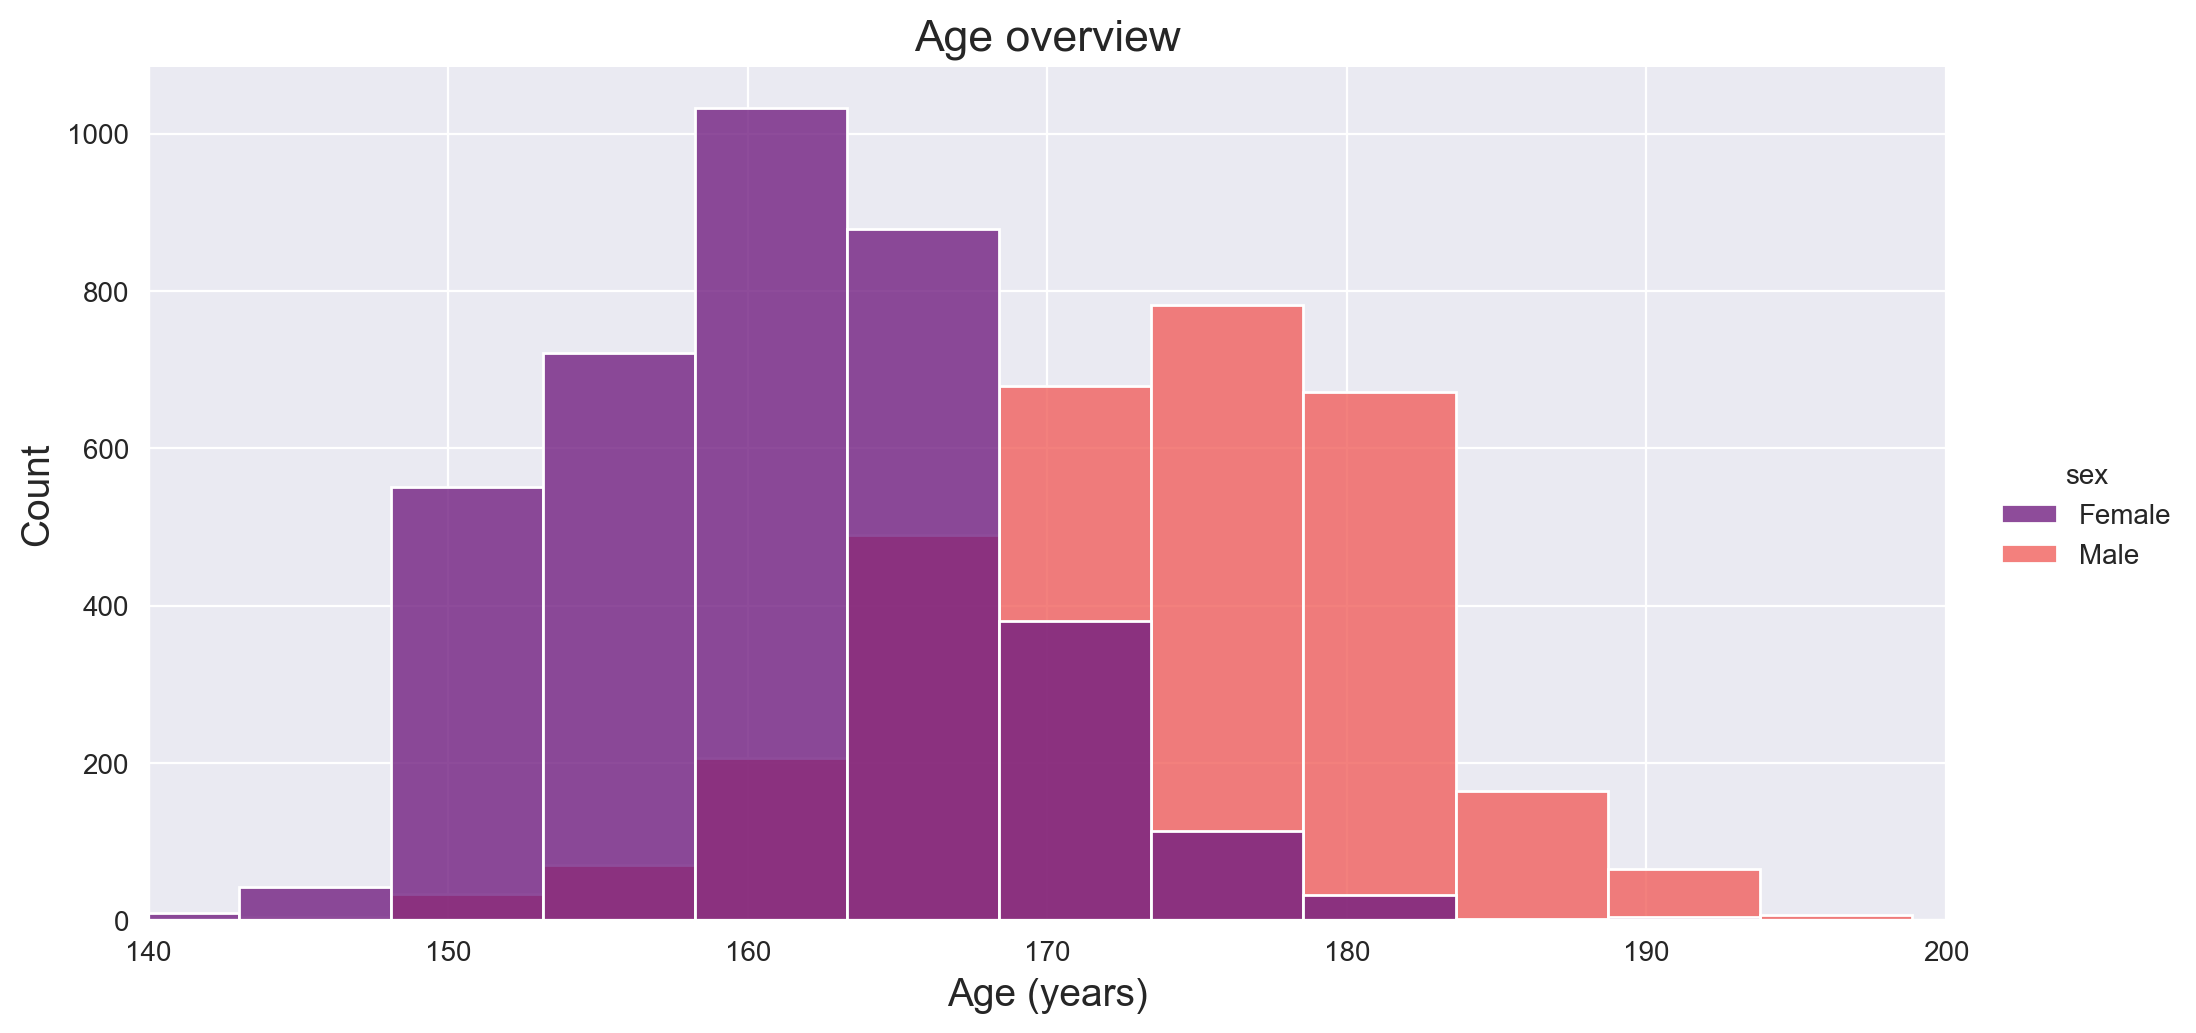

In [113]:
age_plot = sns.displot(
    data=y_sex_data,
    x="height",
    bins=40,
    hue="sex",
    alpha=0.8,
    palette="magma",
    height=5,
    aspect=2,
)
age_plot.fig.set_dpi(200)
plt.xlim(140, 200)
plt.title("Age overview", fontsize=16)
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig("patient_data_analysis_images/age.png", bbox_inches="tight")

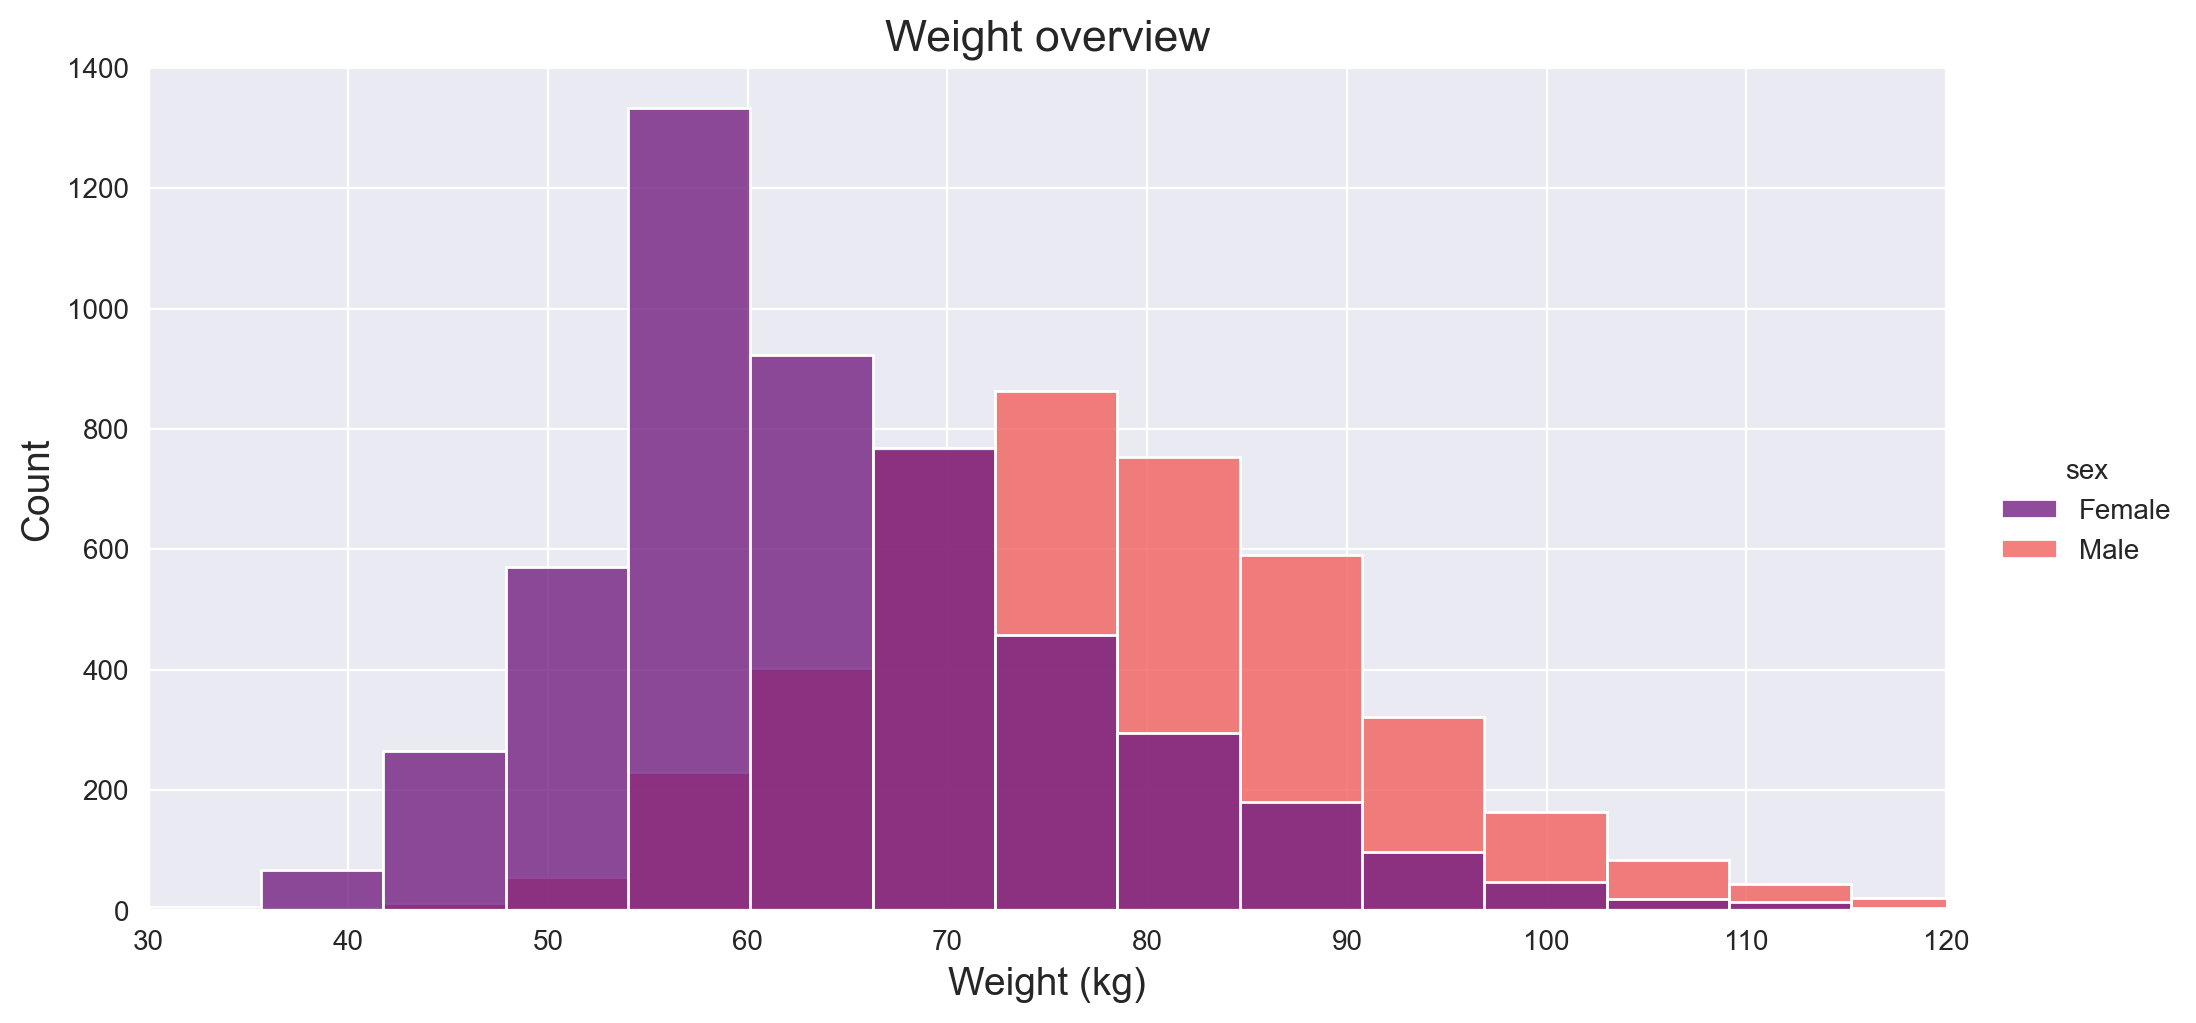

In [73]:
weight_plot = sns.displot(
    data=y_sex_data,
    x="weight",
    bins=40,
    hue="sex",
    alpha=0.8,
    palette="magma",
    height=5,
    aspect=2,
)
weight_plot.fig.set_dpi(200)
plt.xlim(30, 120)
plt.title("Weight overview", fontsize=16)
plt.xlabel("Weight (kg)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig("patient_data_analysis_images/weight.png", bbox_inches="tight")

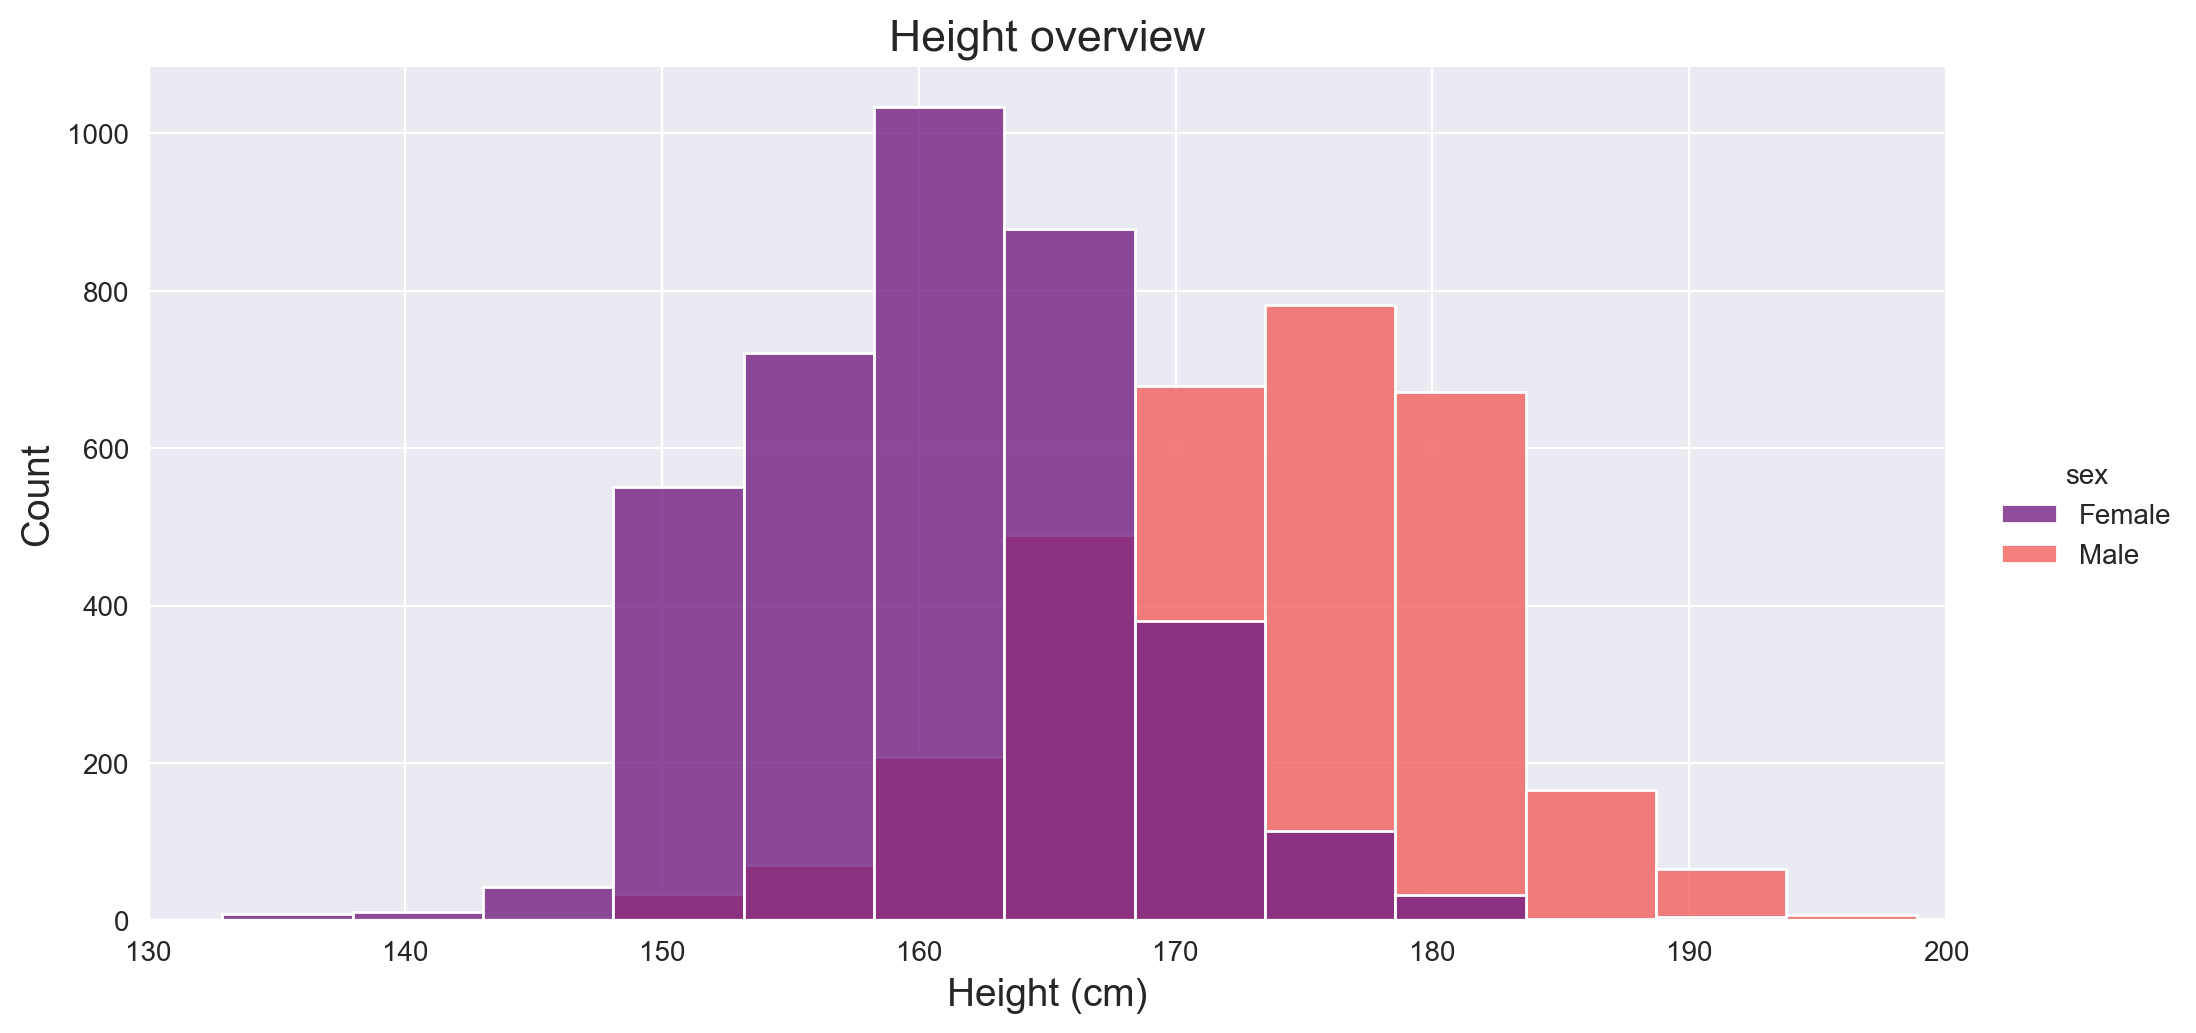

In [74]:
height_plot = sns.displot(
    data=y_sex_data,
    x="height",
    bins=40,
    hue="sex",
    alpha=0.8,
    palette="magma",
    height=5,
    aspect=2,
)
height_plot.fig.set_dpi(200)
plt.xlim(130, 200)
plt.title("Height overview", fontsize=16)
plt.xlabel("Height (cm)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig("patient_data_analysis_images/height.png", bbox_inches="tight")

In [76]:
import numpy as np

flatten_diagnostic_superclass = pd.Series(
    [item for sublist in y_data.diagnostic_superclass for item in sublist]
)
df_diagnostic_superclass = pd.DataFrame(
    data=flatten_diagnostic_superclass.value_counts(), columns=["frequency"]
)

In [77]:
df_diagnostic_superclass.transpose()

,NORM,MI,STTC,CD,HYP
frequency,9517,5473,5237,4901,2649


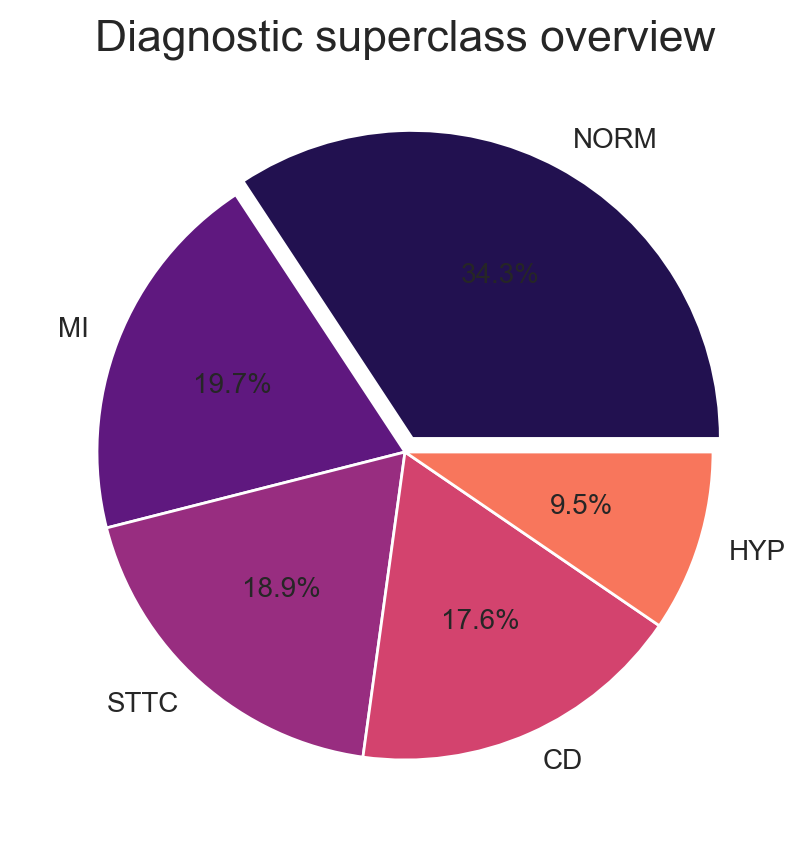

In [78]:
explode = [0.05, 0, 0, 0, 0]

plt.figure(figsize=(15, 5), dpi=200)
plt.title("Diagnostic superclass overview", fontsize=16)
plt.pie(
    x=df_diagnostic_superclass.frequency,
    labels=list(df_diagnostic_superclass.index),
    colors=sns.color_palette("magma"),
    explode=explode,
    autopct="%1.1f%%",
)
plt.savefig(
    "patient_data_analysis_images/diagnostic_superclass.png", bbox_inches="tight"
)

In [79]:
y_diagnostic_superclass_data = y_data.explode("diagnostic_superclass")[
    ["weight", "age", "sex", "diagnostic_superclass"]
].reset_index()

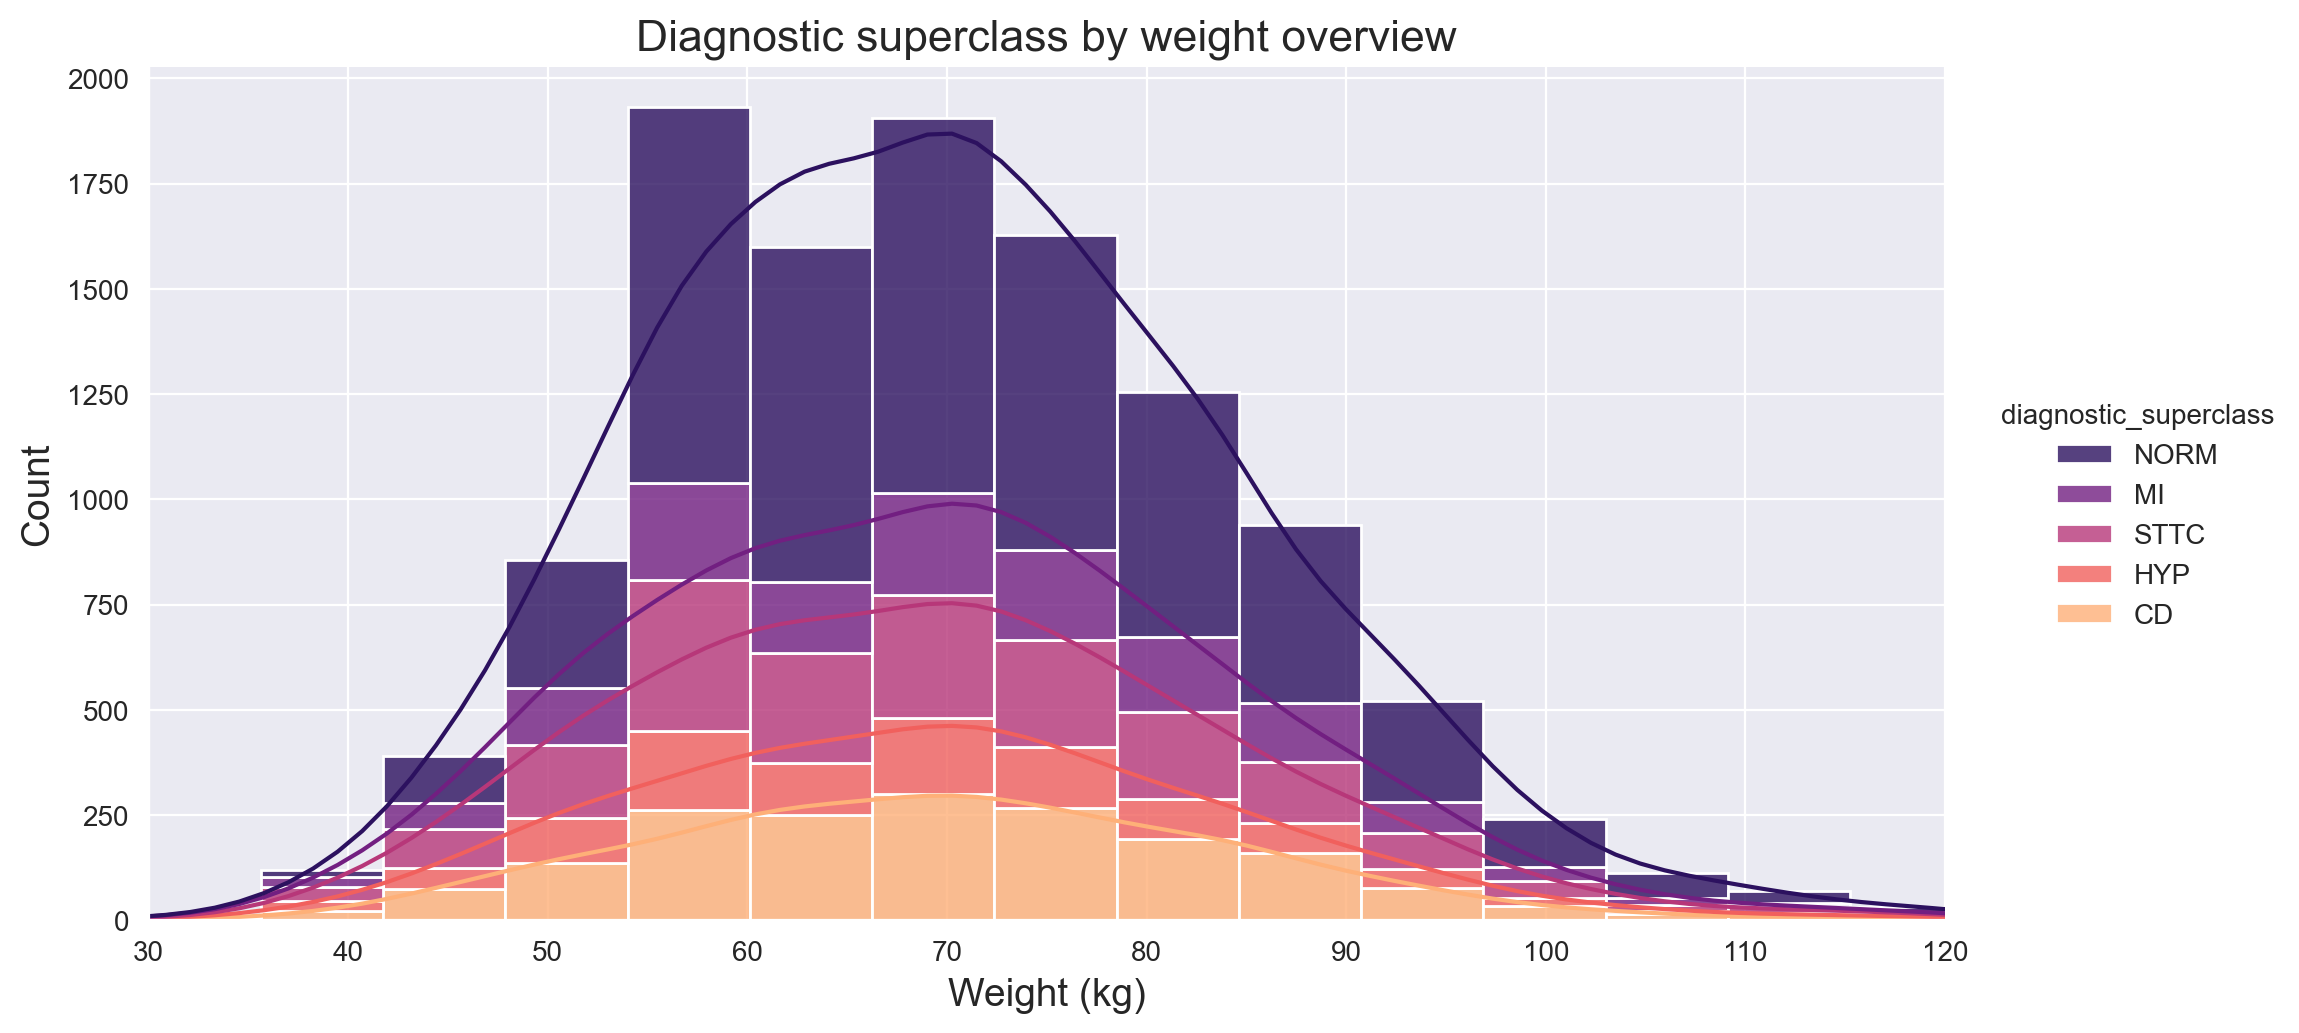

In [80]:
diagnostic_superclass_by_weight = sns.displot(
    data=y_diagnostic_superclass_data,
    x="weight",
    bins=40,
    hue="diagnostic_superclass",
    alpha=0.8,
    palette="magma",
    height=5,
    aspect=2,
    multiple="stack",
    kde=True,
)
diagnostic_superclass_by_weight.fig.set_dpi(200)
plt.xlim(30, 120)
plt.title("Diagnostic superclass by weight overview", fontsize=16)
plt.xlabel("Weight (kg)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig(
    "patient_data_analysis_images/diagnostic_superclass_by_weight.png",
    bbox_inches="tight",
)

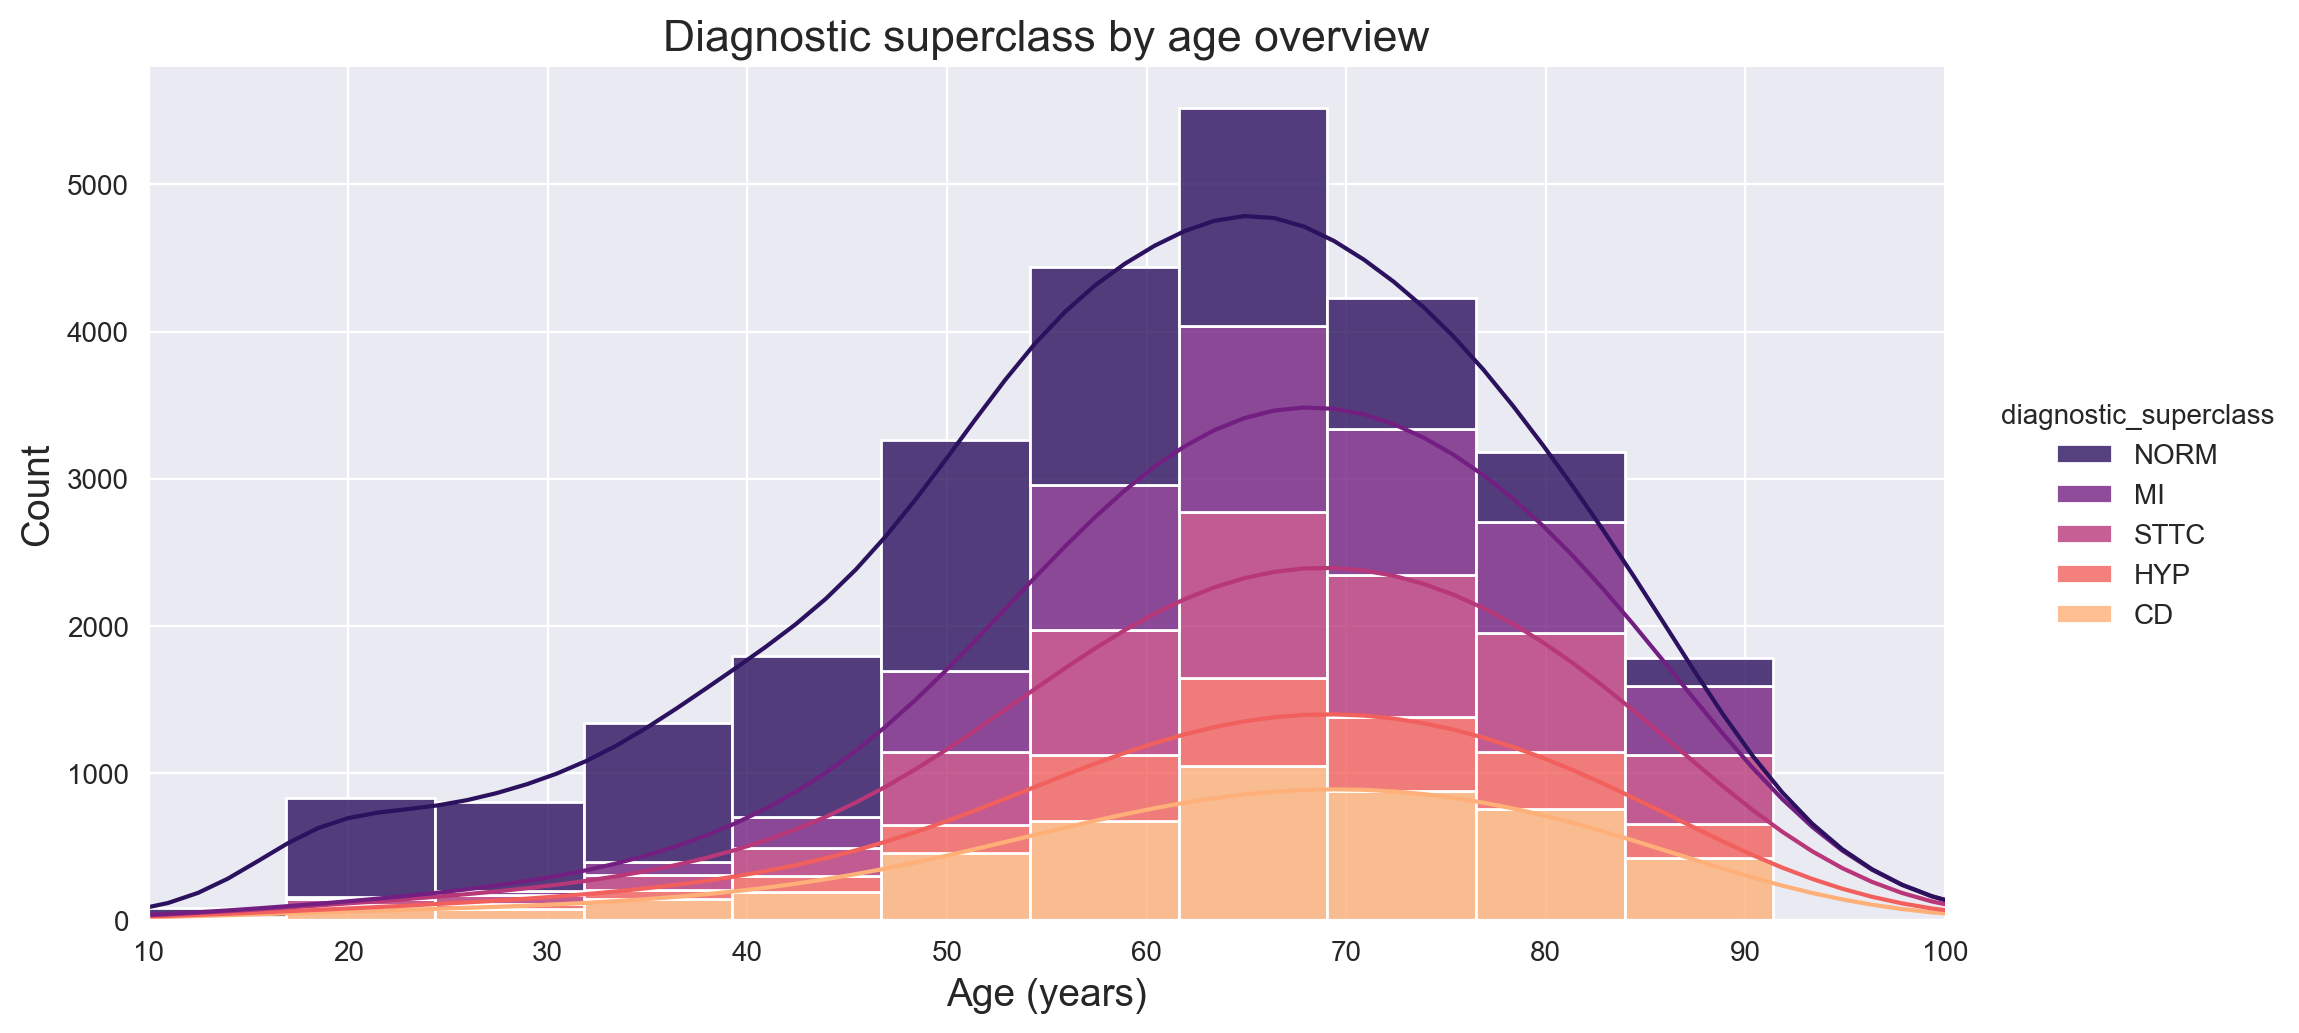

In [81]:
diagnostic_superclass_by_age = sns.displot(
    data=y_diagnostic_superclass_data,
    x="age",
    bins=40,
    hue="diagnostic_superclass",
    alpha=0.8,
    palette="magma",
    height=5,
    aspect=2,
    multiple="stack",
    kde=True,
)
diagnostic_superclass_by_age.fig.set_dpi(200)
plt.xlim(10, 100)
plt.title("Diagnostic superclass by age overview", fontsize=16)
plt.xlabel("Age (years)", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig(
    "patient_data_analysis_images/diagnostic_superclass_by_age.png", bbox_inches="tight"
)

In [82]:
y_diagnostic_superclass_sex_data = y_diagnostic_superclass_data.copy()
y_diagnostic_superclass_sex_data["sex"].replace(
    [0, 1], ["Male", "Female"], inplace=True
)

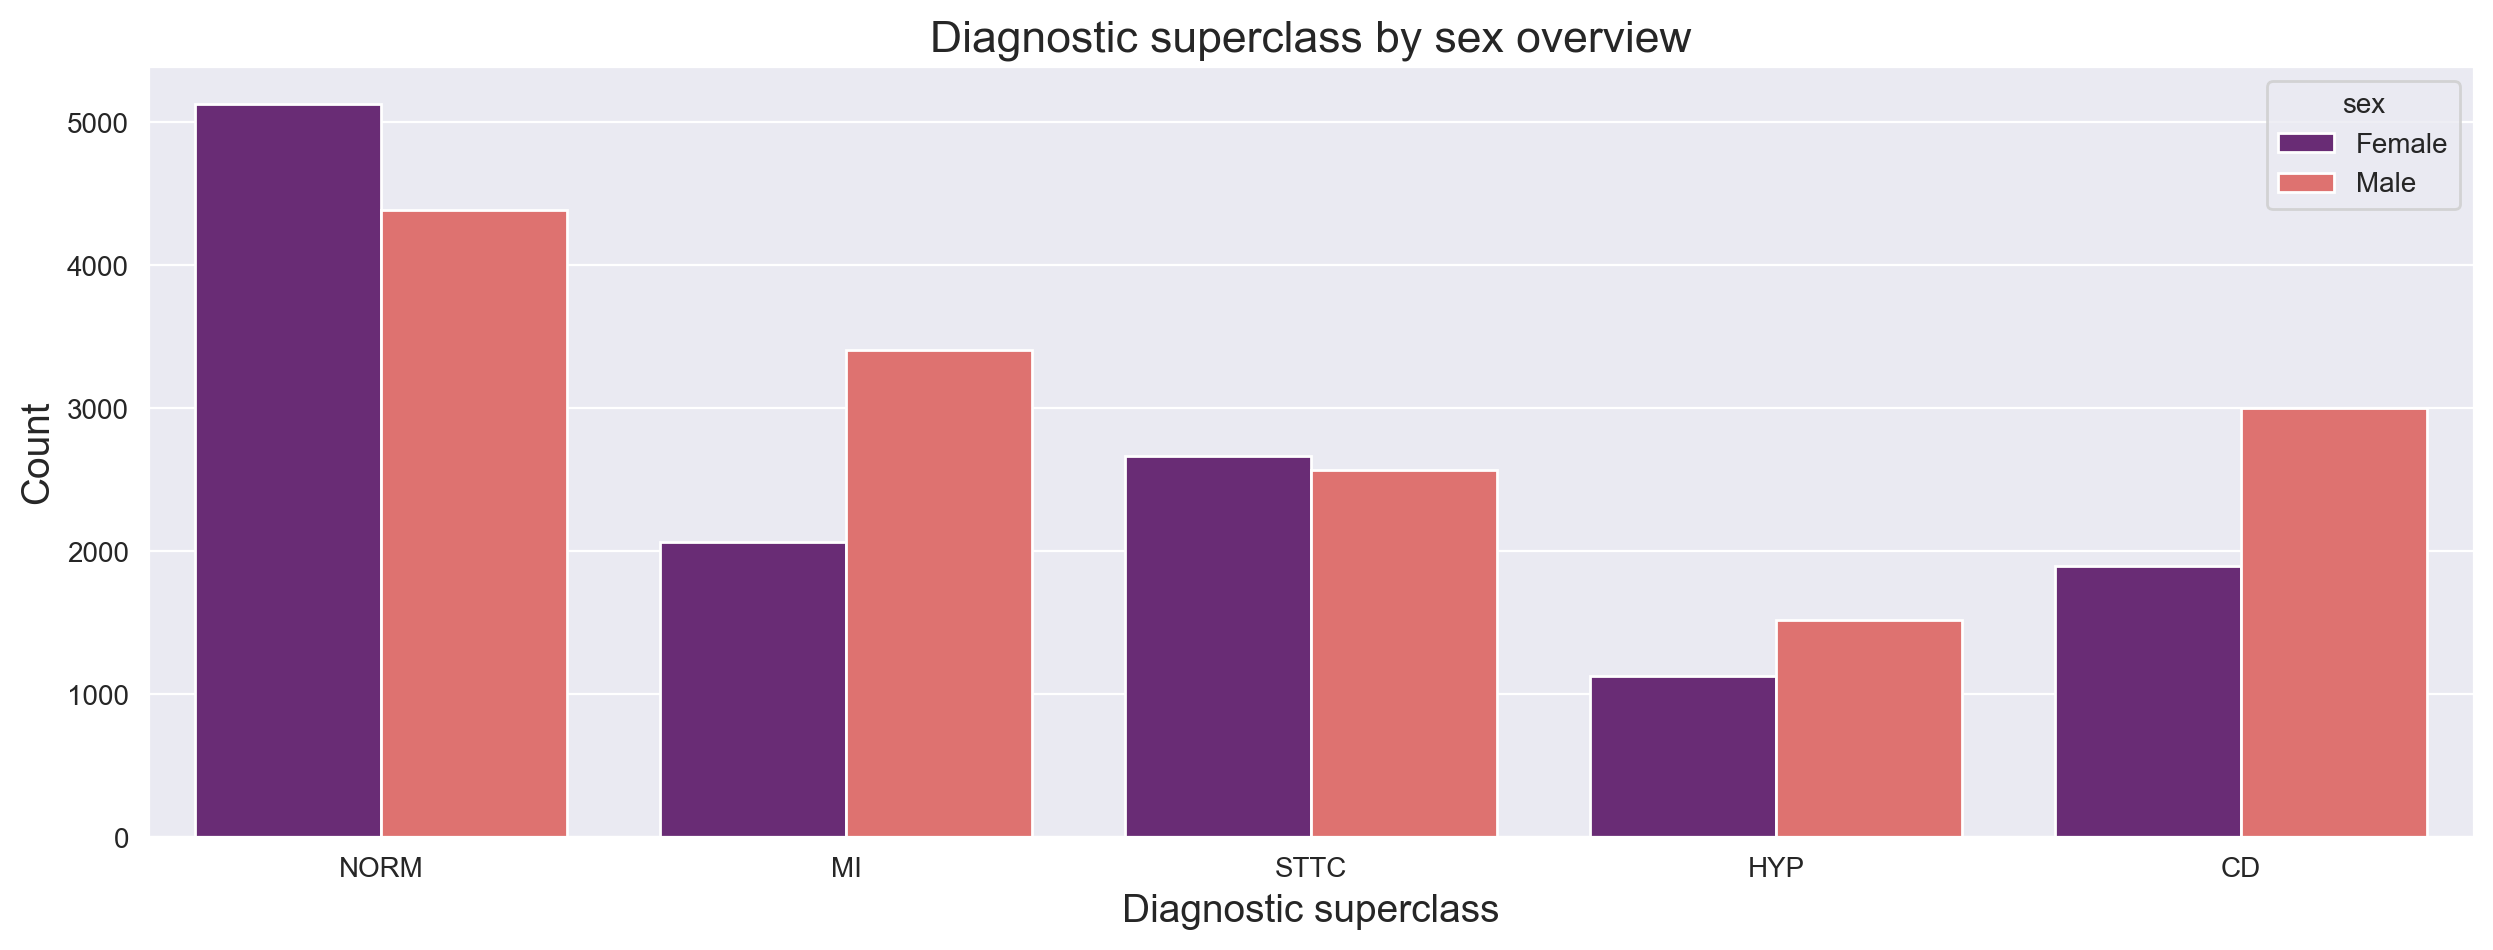

In [83]:
plt.figure(figsize=(15, 5), dpi=200)
sns.countplot(
    data=y_diagnostic_superclass_sex_data,
    x="diagnostic_superclass",
    hue="sex",
    palette="magma",
)
plt.title("Diagnostic superclass by sex overview", fontsize=16)
plt.xlabel("Diagnostic superclass", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.savefig(
    "patient_data_analysis_images/diagnostic_superclass_by_sex.png", bbox_inches="tight"
)